# Data Audits

This notebook is used to check and describe the data used in this project. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Import custom project code
import sys
sys.path.append('../bratios')
from paths import DATA_PATHS as dp

### Load Data

In [2]:
# Read datafile with dataset information
data_info = pd.read_csv(dp.make_file_path(dp.eeg_meta, 'MIPDB_PublicFile', 'csv'))

# Load the dataframe of processed data
df = pd.read_csv(dp.make_file_path(dp.eeg_outputs, 'spectral_measures_dataframe', 'csv'))

### Check Data Descriptions

In [3]:
# Check how many subjects are in the total dataset 
n_total = len(data_info['ID'].values)
print('Total number of subjects: \t', n_total)

Total number of subjects: 	 126


In [4]:
# Check descriptive information for participants ages
data_info[['Age']].describe()

,Age
count,126.000000
mean,15.777778
std,8.030829
min,6.000000
25%,10.000000
50%,13.000000
75%,18.000000
max,44.000000


In [5]:
# Check descriptive information for participants reported sex
#   Note that is male is coded as 1 and female is coded as 2
data_info['Sex'].value_counts()

1    69
2    57
Name: Sex, dtype: int64

### Check Subjects

In [6]:
# Check how many subjects we have included
n_included = len(set(df['Subj_ID'].values))
print('Number of included subjects: \t', n_included)

Number of included subjects: 	 111


In [7]:
# Check how many subjects not included in our analysis
n_dropped = n_total - n_included
print('Number of dropped subjects: \t', n_dropped)

Number of dropped subjects: 	 15


In [8]:
# Check how many subject do not have resting state data available
n_missing_data = sum(data_info.EEG_resting == 0)
print('Number of subjects without resting state data: \t', n_missing_data)

Number of subjects without resting state data: 	 9


In [9]:
# Check the IDs of the subjects missing EEG data
missing_data_ids = set(data_info.ID[data_info.EEG_resting == 0].values)
print(missing_data_ids)

{'A00054122', 'A00055923', 'A00056158', 'A00056733', 'A00057135', 'A00056640', 'A00052593', 'A00055801', 'A00056990'}


In [10]:
# Get the list of IDs of subjects we didn't use
dropped_ids = set(data_info.ID.values) - set(df.Subj_ID.values)

In [11]:
# Remove IDs that are listed as having no data
not_used_ids = dropped_ids - missing_data_ids

In [12]:
# Check the remaining subjects not included
print(not_used_ids)

{'A00054488', 'A00056716', 'A00062219', 'A00054866', 'A00055623', 'A00055628'}


### Dropped Subjects

Reasons subjects were not included:
- Missing resting state (001) files: 'A00055628'
    - This subject had no files marked as resting state, despite what was indicated in the README    
- Insufficient events: 'A00062219', 'A00055623', 'A00056716', 'A00054866', 'A00054488'
    - These subjects did not have enough resting state events in the events file
    - Threshold was >1 resting segment of both EO and EC

Note: 1 subject ('A00056733') who was indicated as not having resting state data, did still have files marked as resting (001). However, the event structure was wrong (seems to be a mis-labeled file). This subject was not used. 

## Check FOOOF Model Fits

In [13]:
# Collect a dataframe of the FOOOF model fit metrics
fit_metrics = df[['fit_error', 'fit_r2', 'fit_n_peaks']]

In [14]:
# Check descriptive statistics of the FOOOF model fits
fit_metrics.describe()

,fit_error,fit_r2,fit_n_peaks
count,12321.000000,12321.000000,12321.000000
mean,0.072135,0.973239,5.650678
std,0.014074,0.029509,1.688014
min,0.039322,0.438997,1.000000
25%,0.062379,0.971836,4.000000
50%,0.070136,0.980374,6.000000
75%,0.079510,0.985271,7.000000
max,0.176990,0.995547,8.000000


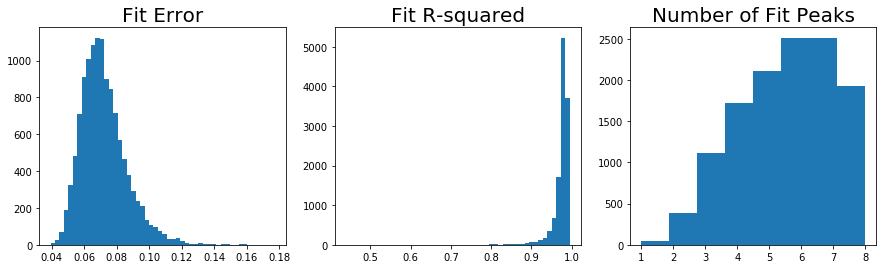

In [15]:
# Plot the distributions of the model fit metrics
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes[0].hist(df.fit_error.values, bins=50);
axes[0].set_title('Fit Error', {'fontsize' : 20});
axes[1].hist(df.fit_r2.values, bins=50);
axes[1].set_title('Fit R-squared', {'fontsize' : 20});
axes[2].hist(df.fit_n_peaks.values, bins=8);
axes[2].set_title('Number of Fit Peaks', {'fontsize' : 20});